In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Matrix_Factorization_Assignment.csv')

In [ ]:
df_filtered = df[df['Index'] % 278!=0]
selectedcol = []
for i in range(5000):
  if(i%278 == 0):
    if(i!=0):
      selectedcol.append(str(i))
print(selectedcol)
cleaned_dataset =df_filtered.drop(selectedcol, axis = 1) 
# Print the new dataframe
df = pd.DataFrame(cleaned_dataset)
print(df.tail(15))



['278', '556', '834', '1112', '1390', '1668', '1946', '2224', '2502', '2780', '3058', '3336', '3614', '3892', '4170', '4448', '4726']
       Index     0    1    2     3    4  ...  4994  4995  4996  4997  4998  4999
44985   4639   6.0  9.0  NaN   0.0  5.0  ...   1.0  10.0   1.0   8.0   NaN   2.0
44986  45889   7.0  NaN  2.0   NaN  NaN  ...   NaN   6.0   NaN   2.0   7.0   4.0
44987  41353  10.0  NaN  NaN   NaN  4.0  ...   8.0   NaN   0.0   0.0   NaN   6.0
44988  45573   3.0  1.0  NaN   NaN  1.0  ...   NaN   0.0   NaN   NaN   NaN   4.0
44989  18992  10.0  NaN  7.0   NaN  2.0  ...   7.0   1.0   4.0   NaN   NaN   NaN
44990  17332   NaN  1.0  6.0   NaN  NaN  ...   NaN  10.0   0.0   6.0   NaN   2.0
44991  42938   NaN  NaN  NaN   0.0  NaN  ...   5.0   2.0   NaN   NaN   0.0   NaN
44992  47095   9.0  NaN  7.0   2.0  9.0  ...   NaN   5.0   NaN   NaN   NaN   NaN
44993  42854   9.0  NaN  NaN   NaN  2.0  ...   NaN   9.0  10.0   6.0   5.0   8.0
44994  14644   NaN  NaN  8.0   4.0  8.0  ...   NaN   2.0

In [ ]:
print(df.shape)

(44844, 4984)


In [ ]:
df_filtered = df[df['Index'] % 2!=0]
selectedcol2 = []
for i in range(4937):
  if(i%2 == 0 ):
    if(i!=0 and str(i) not in selectedcol):
      selectedcol2.append(str(i))
print(selectedcol2)
cleaned_dataset =df_filtered.drop(selectedcol2, axis = 1) 
df = pd.DataFrame(cleaned_dataset)
print(df.head(15))
print(df.shape)

['2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30', '32', '34', '36', '38', '40', '42', '44', '46', '48', '50', '52', '54', '56', '58', '60', '62', '64', '66', '68', '70', '72', '74', '76', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100', '102', '104', '106', '108', '110', '112', '114', '116', '118', '120', '122', '124', '126', '128', '130', '132', '134', '136', '138', '140', '142', '144', '146', '148', '150', '152', '154', '156', '158', '160', '162', '164', '166', '168', '170', '172', '174', '176', '178', '180', '182', '184', '186', '188', '190', '192', '194', '196', '198', '200', '202', '204', '206', '208', '210', '212', '214', '216', '218', '220', '222', '224', '226', '228', '230', '232', '234', '236', '238', '240', '242', '244', '246', '248', '250', '252', '254', '256', '258', '260', '262', '264', '266', '268', '270', '272', '274', '276', '280', '282', '284', '286', '288', '290', '292', '294', '296', '298', '300', '302', '3

In [ ]:

Uids = df[["Index"]]
print(Uids)
df = df.drop(df[['Index']], axis=1)
# creating numpy array from the main dataframe 
df=df.to_numpy(dtype='float', na_value=0)
df

       Index
0      11071
2      25325
6      28289
7       3827
9      13205
...      ...
44987  41353
44988  45573
44992  47095
44998   1875
44999    985

[22493 rows x 1 columns]


array([[ 1.,  7.,  9., ...,  0.,  0.,  0.],
       [ 5.,  7.,  9., ...,  0.,  0.,  7.],
       [ 0.,  3.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  0.,  2., ...,  0.,  0.,  0.],
       [10.,  0.,  3., ...,  0.,  8.,  8.],
       [ 0.,  7.,  0., ...,  0.,  2.,  0.]])

# initialize u1,u2,u3... matrix randomly

In [ ]:
import numpy as np
#U = np.random.randint(6, size=(22493, 3))
def randomInitialization_U(N,K):
  U = np.random.random((N, K))
  return U

def randomInitialization_V(M,K):
  V = np.random.random((M, K))
  return V

initilize λu  and λv

In [ ]:
λu = (0.00015 + 0.0001 *(278 % 8))
λv = (0.00025 - 0.0001 * (278 % 7))
print(λu,λv)

0.00075 -0.00025


In [ ]:
def identity_mul_λv(K):
  return np.dot(np.identity(K, dtype = float),λv)

def identity_mul_λu(K):
  return np.dot(np.identity(K, dtype = float),λu)
#I = np.identity(3, dtype = float)
#λvI = np.dot(I,λv)
#print(λvI)
#print("Matrix I : \n", I)

In [ ]:
def mul_Of_U_Norm_And_U_transpose(U_norm):
  return U_norm.transpose().dot(U_norm)

def mul_Of_V_Norm_And_V_transpose_U(V_norm):
  return V_norm.transpose().dot(V_norm)

#A = np.dot(U,U_transpose)
def sumation_of_matrix(U,K):
  return mul_Of_U_Norm_And_U_transpose(U) + identity_mul_λv(K)

def sumation_of_matrix_U(V,K):
  return mul_Of_V_Norm_And_V_transpose_U(V) + identity_mul_λu(K)

In [ ]:
def VmUpdate(ratings,normalized_U,K):

  a = sumation_of_matrix(normalized_U,K)
  print('a shape:',a.shape)
  a_inv = np.linalg.inv(a);
  a
  XnUn = ratings.dot(normalized_U);
  XnUn
  print('XnUn shape:',XnUn.shape)
  return XnUn
def UmUpdate(ratings,normalized_V,K):

  a = sumation_of_matrix_U(normalized_V,K)
  print('a shape:',a.shape)
  a_inv = np.linalg.inv(a);
  a
  XnUn = ratings.dot(normalized_V);
  XnUn
  print('XnUn shape:',XnUn.shape)
  return XnUn
#res = a + identity_mul_λv

In [ ]:
import numpy as np;
from sklearn import preprocessing;
from sklearn.metrics import mean_squared_error;
import matplotlib.pyplot as plt;

In [ ]:
class MatrixFactorization():
  def __init__(self,R,K,lambda_u,lambda_v,iterations):
    self.R = R
    self.N,self.M = R.shape
    self.K  = K
    self.lambda_u = lambda_u
    self.lambda_v = lambda_v
    self.iterations = iterations;
  def train(self):
      self.U = randomInitialization_U(self.N, self.K)
      self.V = randomInitialization_V(self.M, self.K)
      print(self.U.shape);
      print(self.V.shape);
      # #normalize
      self.normalized_U = preprocessing.normalize(self.U)
      self.normalized_V = preprocessing.normalize(self.V)
      print('normalization U',self.normalized_U)

      
     
      self.train_mse = [];
      for _ in range(self.iterations):
        self.normalized_UU =UmUpdate(self.R,self.normalized_V,self.K)
        print('update U',self.normalized_U)
        self.normalized_VV = VmUpdate(self.R.transpose(),self.normalized_UU,self.K)
        print('update V',self.normalized_V) 
        predictions = self.predict()
        train_mse = self.calculate_mse(self.R,predictions)
        self.train_mse.append(train_mse)
      return self
 
  #loss function
  def calculate_mse(self,y_true,y_pred):
    mask = np.nonzero(y_true)
    mse = mean_squared_error(y_true[mask], y_pred[mask]);
    return mse
  def predict(self):
    pred = self.normalized_UU.dot(self.normalized_VV.transpose());
    print('prediction..',pred)
    return pred



In [ ]:

mf1 =MatrixFactorization(df,5,λu,λv,20);
mf1.train();
#mf2 =MatrixFactorization(df,10,λu,λv,20);
#mf2.train();
#mf =MatrixFactorization(df,20,λu,λv,20);
#mf.train();

(22493, 5)
(2532, 5)
normalization U [[0.12379057 0.08640044 0.56691097 0.27995481 0.75990007]
 [0.01359161 0.51742228 0.45646353 0.47703546 0.54421289]
 [0.6284069  0.24962998 0.14567694 0.60212457 0.39876544]
 ...
 [0.73032686 0.31557207 0.32726521 0.23517696 0.4523563 ]
 [0.48117743 0.47602458 0.37127849 0.53376807 0.34512723]
 [0.54342808 0.28979884 0.48687794 0.30216311 0.54069388]]
a shape: (5, 5)
XnUn shape: (22493, 5)
update U [[0.12379057 0.08640044 0.56691097 0.27995481 0.75990007]
 [0.01359161 0.51742228 0.45646353 0.47703546 0.54421289]
 [0.6284069  0.24962998 0.14567694 0.60212457 0.39876544]
 ...
 [0.73032686 0.31557207 0.32726521 0.23517696 0.4523563 ]
 [0.48117743 0.47602458 0.37127849 0.53376807 0.34512723]
 [0.54342808 0.28979884 0.48687794 0.30216311 0.54069388]]
a shape: (5, 5)
XnUn shape: (2532, 5)
update V [[0.61754122 0.55539105 0.42646651 0.33376211 0.13004916]
 [0.50104029 0.70726204 0.31654501 0.34561649 0.17055066]
 [0.4886844  0.26700594 0.28114022 0.7032778

In [ ]:
def plot_data(model):
    linewidth = 3
    plt.plot(model.train_mse, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    
    plt.legend(loc = 'best');
    plt.show();

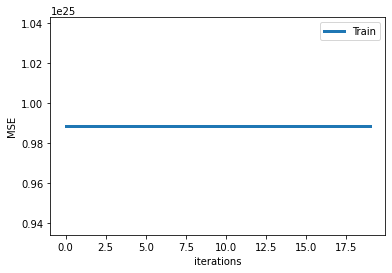

In [ ]:

plot_data(mf1);
#plot_data(mf2);


In [ ]:
def cosine_similarity(model):
    sim = model.normalized_VV.dot(model.normalized_VV.T)
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return sim / norms / norms.T

similarity_movies1 = cosine_similarity(mf1)
#similarity_movies2 = cosine_similarity(mf2)
print(similarity_movies1)
print('**********************************************mf2**************************************************')
#print(similarity_movies2)

[[1.         0.99999996 0.99999993 ... 0.99999989 0.99999994 0.99999995]
 [0.99999996 1.         0.99999992 ... 0.99999991 0.9999998  0.99999996]
 [0.99999993 0.99999992 1.         ... 0.99999993 0.99999982 0.99999999]
 ...
 [0.99999989 0.99999991 0.99999993 ... 1.         0.99999981 0.99999995]
 [0.99999994 0.9999998  0.99999982 ... 0.99999981 1.         0.99999982]
 [0.99999995 0.99999996 0.99999999 ... 0.99999995 0.99999982 1.        ]]
**********************************************mf2**************************************************
